<div style="border:solid green 2px; padding: 20px">
    
<b>Юлия, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделала большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример: 
    
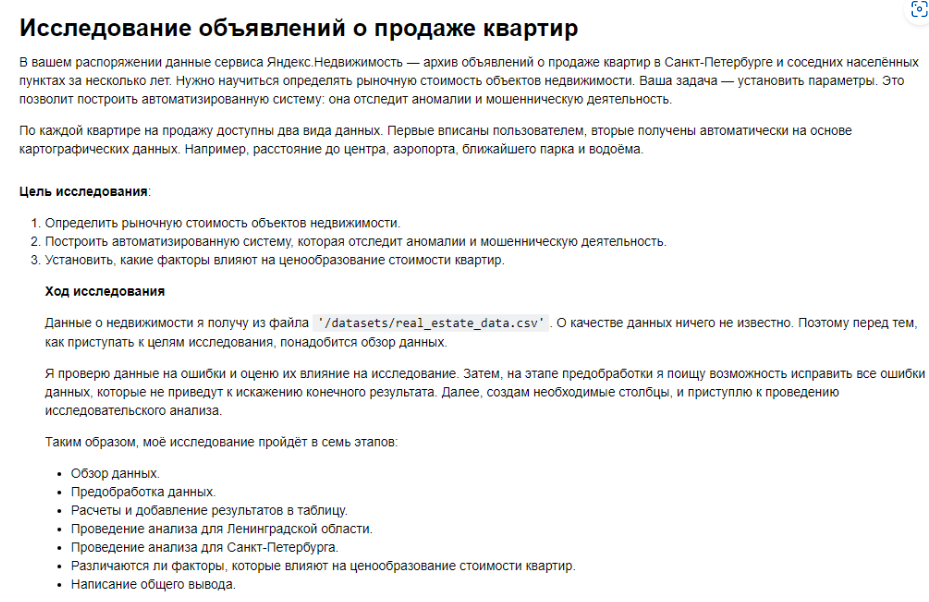
</div>

<div class="alert alert-info"> <b> Привет, Александр. большое спасибо за оперативную проверку моей работы и подсказки, как улучшить мой проект :) :</b></div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Юлия, рад тебя видеть) Спасибо за обратную связь и крутой проект ^^
</div>

### Откройте файл с данными и изучите общую информацию. 



<div > <b>Исследование о продаже объекто недвижимости:</b> 
    
  <b> Цель исследования </b>- проананализировать факторы, влияющие на продажу квартир в ленинградской области.
    
  <b> Задачи: </b>
    
 - изучить датасет и провести обработку данных с целью повышения качества и надеждности данных для анализа.
 - проанализировать параметры объектов недвижимости (квартир) в датасете
 - проанадизировать зависимость стоимости от параметров объектов недвижимости.
 - проанализировать активность пользователей в части размещения объявления в зависимости от дня недели, месяца, года.
 - визуализировать проведенный анализ.

  <b> Данные для исследования:</b>  '/datasets/real_estate_data.csv'
</div>


In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
display(df.head(20))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


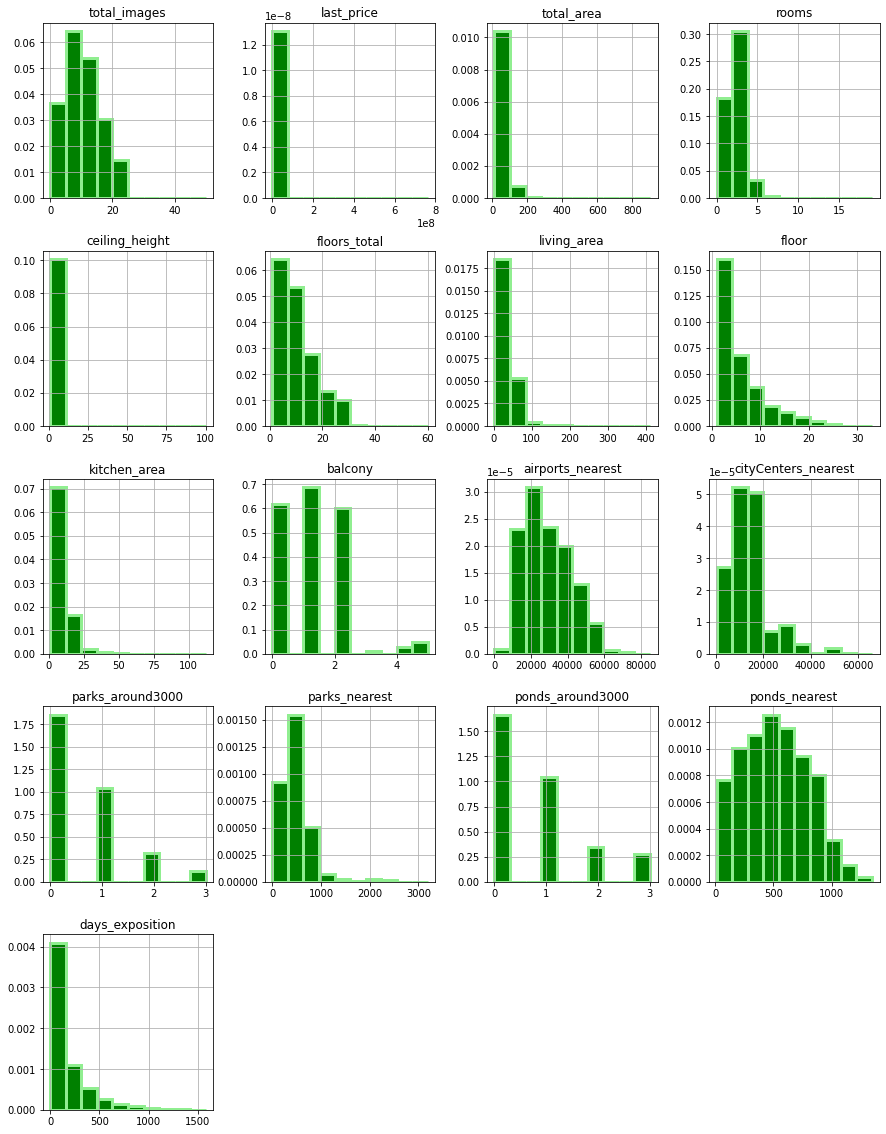

In [3]:
#построим диаграммы
df.hist(figsize=(15, 20), grid=True, color = 'green', ec= 'lightgreen', lw=3, density=True)
plt.gca().set_facecolor('#999')

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
df.duplicated().sum()

#явных дуликатов в строках не обнаружено

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверка на дубликаты - основа предобработки данных
</div>

In [6]:
#скорректируем наименование колонки 
df.rename (columns={'cityCenters_nearest': 'city_centers_nearest', 'ponds_around3000': 'ponds_around_3000','parks_around3000':'parks_around_3000'}, inplace=True)


<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть

### Предобработка данных

In [7]:

df.isna().sum().sort_values(ascending=False) 

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

<div><b>Общие наблюдения</b>
Найдены колонки, в которых пропущены значения.
Пропуски и ошибки в данных могут быть из-за того, что поля были необязательны для заполнения.
и/или заполнение разрешено в свободной форме без автоматического контроля.
Данные также могли быть повреждены при выгрузки из системы. </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Оставлю общий комментарий по проекту. Давай все выводы и ходы действий перенесем в обычную ячейку markdown. Комментировать стоит лишь сам код
</div>

<div class="alert alert-info">  скорректировала </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Спасибо за правку) Так лучше
</div>

In [63]:
 #найдем процент пропущенных значений от общего количества записей. 
 #Там где значения не существенные, строки можно удаолить, остальные необходимо заполнить
pd.DataFrame(round(df.isna().mean()*100,)).sort_values(by = 0, ascending = False).style.background_gradient('coolwarm')

,0
parks_nearest,61.000000
ponds_nearest,56.000000
days_exposition,14.000000
ponds_around_3000,13.000000
parks_around_3000,13.000000
city_centers_nearest,13.000000
total_images,0.000000
last_price,0.000000
floor_type,0.000000
year,0.000000


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')
    

<div class="alert alert-info">  скорректировала. спасибо, круто получилосьно почему-то не округлились значения и отсротировать по убыванию не получилось  </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Показал сортировку)
</div>

In [9]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

В единственной или последней строке ячеки кода Юпитера, метод print() не обязательно писать, в отличии от тренажера
</div>

<div class="alert alert-info">  скорректировала  </div>

In [10]:
df['locality_name']=df['locality_name'].str.lower()
df['locality_name']=df['locality_name'].str.replace('ё','e')
df['locality_name']=df['locality_name'].str.replace('городской поселок', 'поселок городского типа')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код
</div>

In [11]:
df['locality_name'].unique()

array(['санкт-петербург', 'посeлок шушары', 'городской посeлок янино-1',
       'посeлок парголово', 'посeлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фeдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посeлок металлострой',
       'посeлок городского типа лебяжье',
       'посeлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посeлок аннино',
       'поселок городского типа ефимовский', 'посeлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посeлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [12]:
df['locality_name'].value_counts ()

санкт-петербург                   15721
посeлок мурино                      522
посeлок шушары                      440
всеволожск                          398
пушкин                              369
                                  ...  
поселок коробицыно                    1
поселок городского типа рябово        1
поселок семиозерье                    1
посeлок шугозеро                      1
деревня хязельки                      1
Name: locality_name, Length: 363, dtype: int64

In [13]:
df['ceiling_height'].head(10) # пропущенные значения можно заполнить медианным

0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
5     NaN
6     NaN
7     NaN
8     NaN
9    2.50
Name: ceiling_height, dtype: float64

In [14]:
#количество этажей должно быть целым числом
#удалим строки с 0 значением и изменим тип данных
df.dropna(subset=['floors_total'], inplace=True)
try:
    df['floors_total'] = df['floors_total'].astype(int)
    print ('ok')
except:
    print ('failed')

ok


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь собственные функции
</div>

In [15]:
#сначала изменим ти данных в колонках, которые не будем обогащать значениями
df['last_price'] = df['last_price'].astype(int)
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'])






In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

In [17]:
df['is_apartment'].unique()#скорее всего пропущенные значения говорят о том, 
#что данный объект не является аппартаментами. значения можно заменить на False


array([nan, False, True], dtype=object)

In [18]:

print (df['rooms'].max())
print (df['rooms'].mean())
print (df['rooms'].min())
print (df[df['rooms']>=10])
ratio_0 = df['living_area'].median() / df['rooms'].median()
print ('Средняя площадь на 1 комнату:', ratio_0)
print ('Оценочная площадь квариры с максимальным количеством комнат должна быть:',(df['rooms'].max()*ratio_0), 'м')

19
2.071147249396519
0
       total_images  last_price  total_area first_day_exposition  rooms  \
648               3    17500000       183.7           2018-07-01     11   
866               5    25000000       363.0           2017-12-23     14   
4149              6    23000000       272.6           2018-01-11     10   
5358             20    65000000       590.0           2019-02-14     15   
9688              8    33000000       194.1           2017-02-07     11   
14498             6    32250000       374.6           2018-06-09     19   
18119             4    15500000       216.1           2016-07-04     10   
18848             6    28500000       270.0           2015-03-02     16   
18891            11    40000000       290.0           2016-06-21     10   
19540             8   420000000       900.0           2017-12-06     12   
20829             6    28659000       245.4           2016-03-31     14   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \


Максимальное количество комнат - 19. Цифра достаточно большоая, но иногда бывает перепланировка квартир в 2-3 этажа, 
Возможно такие значения бывают, поэтому из данных решила не удалять, учитывая, что максимальная стоимость квартир почти 1 млрд.
0 комнат скорее всего в квратирах-студиях.
Получилось, что срденяя площадь 1 комнаты равна 15 кв м, 
Таким образом, если взять максимальное количество комнат - 19 * 15м, получается 285 м.
В датасете площадь такой квартиры 374 м. получается, что в данным ошибки нет.

In [19]:
#стандартная высота потолка 2.5 м, максимальная до 3.7. удалим значения и скорректируем те, в которых могла быть ошибка
df.update(df[(df['ceiling_height']>=25)&(df['ceiling_height']<=37)]['ceiling_height']/10)
df.drop(index=df.query('ceiling_height >3.7 and ceiling_height<2.5').index, inplace=True)



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Круто, что не хардкодишь, а используешь условие
</div>

In [20]:
display(df.tail(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
23679,0,2500000,35.00,2017-12-08,1,NaN,9,NaN,4,NaN,...,NaN,NaN,сосновый бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23680,14,5000000,59.00,2019-04-04,3,2.50,5,52.0,1,NaN,...,7.00,NaN,санкт-петербург,26835.0,11878.0,0.0,NaN,0.0,NaN,NaN
23681,13,5250000,43.00,2018-05-11,2,2.50,5,29.0,2,NaN,...,6.00,NaN,санкт-петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80.0
23682,11,2350000,35.60,2016-06-23,1,2.50,5,17.0,4,False,...,8.30,2.0,выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000,62.80,2018-09-18,4,2.50,5,45.5,3,NaN,...,5.50,NaN,посeлок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23684,20,21400000,145.00,2018-11-02,4,3.00,26,71.4,17,NaN,...,15.60,NaN,санкт-петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000,31.00,2019-01-24,1,2.50,5,17.3,5,NaN,...,5.60,1.0,ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23686,8,3300000,31.00,2017-04-29,1,2.55,9,18.0,6,NaN,...,6.50,0.0,санкт-петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000,39.00,2017-12-16,1,NaN,9,20.0,6,NaN,...,11.00,2.0,санкт-петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.0,12,NaN,...,15.00,NaN,санкт-петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


In [21]:
#kitchen_area -рассчитать медиану и заполнить пропуски исходя из категории жилья по площади
#balcony - изменить Nan на 0

#airports_nearest       заполнить медианным значением по городу

#parks_around3000       изменить Nan на 0
#parks_nearest          изменить Nan на 0
#ponds_around3000       изменить Nan на 0
#ponds_nearest          изменить Nan на 0
#days_exposition -  заполнить медианным значением
#floors_total      удалить         
#locality_name  удалить

In [22]:
#сначала удалим столбцы с 0 значением
df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)

print (df.isna().sum().sort_values(ascending=False))

is_apartment            20805
parks_nearest           15535
ponds_nearest           14529
balcony                 11475
ceiling_height           9084
airports_nearest         5524
city_centers_nearest     5501
ponds_around_3000        5500
parks_around_3000        5500
days_exposition          3171
kitchen_area             2222
living_area              1865
locality_name               0
total_images                0
last_price                  0
studio                      0
floor                       0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, также, если пропусков меньше 5-10% их лучше сразу удалить, дабы сэкономить время
</div>

In [23]:
#заменим значения в столбцах на 0
df['balcony']=df['balcony'].fillna(0).astype(int)
df['is_apartment']=df['is_apartment'].fillna(0).astype(bool)


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

In [24]:
#проверим актулаьное значение пропусков
df.isna().sum().sort_values(ascending=False)

parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
city_centers_nearest     5501
ponds_around_3000        5500
parks_around_3000        5500
days_exposition          3171
kitchen_area             2222
living_area              1865
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [25]:
#заменим остальные значения медианными
df['ceiling_height'] = (df.groupby('locality_name')['ceiling_height'].transform(lambda g: g.fillna(g.median())))


print (df['ceiling_height'].isna().sum())


119


In [26]:
df['airports_nearest'] = df.groupby(['locality_name'])['airports_nearest'].apply(lambda x: x.fillna(x.median()))
df['airports_nearest'].fillna(df['airports_nearest'].median(), inplace=True)

print (df['airports_nearest'].isna().sum())


0


In [27]:
#найдем пропорцию жилой площади к общей площади посчитаем медианное значение
#найдем пропорцию кухни к общей площади посчитаем медианное значение
#заполним пропуски полученным значением (доли), умноженной на общую площадь (то есть находим метраж кухни и жилой площади от общей площади)
ratio_1 = df['living_area'].median() / df['total_area'].median()
ratio_2 = df['kitchen_area'].median() / df['total_area'].median()
df['living_area'].fillna(ratio_1 * df['total_area'], inplace=True)
df['kitchen_area'].fillna(ratio_2 * df['total_area'], inplace=True)

print (df['living_area'].isna().sum())
print (df['days_exposition'].isna().sum())

0
3171


In [28]:
#проверим, имзенились ли типы данных
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23446 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [29]:
display(df.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.000000,8,False,...,25.000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.615,11,18.600000,1,False,...,11.000,2,посeлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.700,5,34.300000,4,False,...,8.300,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.700,14,91.730769,9,False,...,27.825,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.000000,13,False,...,41.000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.600,12,14.400000,5,False,...,9.100,0,городской посeлок янино-1,26763.0,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.640,26,10.600000,6,False,...,14.400,1,посeлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.700,24,41.307692,22,False,...,18.900,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.700,27,15.430000,26,False,...,8.810,0,посeлок мурино,26763.0,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.500,9,43.600000,7,False,...,6.500,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div><b>ОБЩИЕ ВЫВОДЫ:</b>
В данных достаточно болбшое количество пропусков в части описания парамтеров недвижимости, а именно: удаленность от центра города, от аэропорта, зеленой зоны (парков и водоемов), указания плоащди кухни и жилой площади, высоты потолков. Также много пропущенных значений в продолжительности публикации обяъвлений.
Параметры кварти скорее всего были необязательными полями для заполнения, поэтому пользователи не указали значения, но некоторые параметры действительно являются критичными для покупкию В целях анализа пропущенные значения были заполнены логическими или медианными значениями для корректности выполнения дальнейших расчетов.

А вот количество дней публикации скорее всего автоматически рассчитывается в системе, и поэтому пропущенные значения могут говорить о том, что данные были повреждены при выгрузке.</div>



<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует вывод после раздела (можно описать качество исходных данных). Поправишь, этот момент в проекте?
</div>

<div class="alert alert-info">  скорректировала  </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [30]:
#цена одного квадратного метра
df['price_per_meter']=(df['last_price']/df['total_area']).round(2)
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
df['week_day']=df['first_day_exposition'].dt.weekday
#месяц публикации объявления;
df['month']=df['first_day_exposition'].dt.month
#год публикации объявления;
df['year']=df['first_day_exposition'].dt.year
#тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor_type(f):
    if f['floor']==1:
        return 'первый'
    elif f['floor']==f['floors_total']:
        return 'последний'
    else: 
        return 'другой'

df['floor_type'] = df.apply(floor_type, axis=1)

#расстояние  в километрах (переведите из м в км и округлите до целых значений).

df['airports_nearest']=(df['airports_nearest']/1000).astype(int)
df['parks_nearest']=(df['parks_nearest']/1000)

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-info"> спасибо, учту </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

In [31]:
display(df.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,week_day,month,year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.000000,8,False,...,1.0,0.482,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.615,11,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.700,5,34.300000,4,False,...,1.0,0.090,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.700,14,91.730769,9,False,...,2.0,0.084,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.000000,13,False,...,2.0,0.112,1.0,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.600,12,14.400000,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.640,26,10.600000,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.700,24,41.307692,22,False,...,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.700,27,15.430000,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.500,9,43.600000,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой


In [32]:
print (df['last_price'].max())
print (df['last_price'].min())
ratio_4 = (df['last_price'].median() / df['total_area'].median()).round(2)
print ('Средняя стоимость за квадратный метр:', ratio_4)
print ('Минимальная площадь квартиры',df['total_area'].min())
#Норма предоставления жилплощади на одного человека в России составляет 33 кв
#таким образом минимальная площадь должна быть 33 м кв и минимальная стоимость жилья 2 948 418.
#применим фильтр к данным и перезапишем с учетом условий
df=df.loc[(df['last_price']>=2948418)&(df['total_area']>=33)]

763000000
12190
Средняя стоимость за квадратный метр: 89346.15
Минимальная площадь квартиры 12.0


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Шаг 3.6 лучше перенести сюда
</div>

<div class="alert alert-info"> перенесла </div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Если честно, то не увидел тут расстояние до центра в км
</div>

### Проведите исследовательский анализ данных

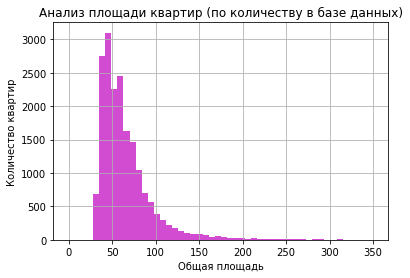

Показатели


count    18646.000000
mean        66.065361
std         37.591541
min         33.000000
25%         44.200000
50%         57.200000
75%         75.000000
max        900.000000
Name: total_area, dtype: float64

In [33]:
#общая площадь;

df['total_area'].hist(bins=50, range=(0,350),grid=True, color='m', alpha=0.7)
plt.title('Анализ площади квартир (по количеству в базе данных)')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['total_area'].describe()



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь метод range() для определения пиковых значений
</div>

<div><b>Наибольшее количество квартир площадью 44-75 кв м<div><b>

In [34]:
df.corr().style.background_gradient('coolwarm')


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,week_day,month,year
total_images,1.000000,0.090290,0.086311,0.063001,0.031841,-0.007643,0.072892,0.025088,0.009738,-0.002622,-0.021522,0.083077,0.040974,-0.002739,-0.032778,0.019274,-0.010552,-0.013825,0.001602,-0.041239,0.117118,-0.010789,0.006076,0.154361
last_price,0.090290,1.000000,0.646909,0.347653,0.202314,-0.060600,0.576588,-0.005672,0.027035,-0.000840,0.012307,0.497245,-0.007208,-0.021070,-0.204970,0.158101,-0.019386,0.163070,-0.088248,0.081305,0.758314,0.005992,0.001705,-0.041473
total_area,0.086311,0.646909,1.000000,0.737624,0.273084,-0.147154,0.943480,-0.067245,0.034179,-0.005930,0.011177,0.633955,-0.018672,-0.030945,-0.221875,0.176721,-0.028277,0.164243,-0.103298,0.151353,0.285361,-0.002078,0.003607,-0.080549
rooms,0.063001,0.347653,0.737624,1.000000,0.155312,-0.311394,0.816355,-0.203391,0.000556,-0.043366,-0.017327,0.269179,-0.042234,-0.065462,-0.163854,0.146539,-0.065396,0.088043,-0.060408,0.122113,0.023283,-0.002947,-0.003695,-0.053529
ceiling_height,0.031841,0.202314,0.273084,0.155312,1.000000,-0.091789,0.259960,-0.044402,0.050822,0.029817,0.006406,0.229042,-0.037100,-0.063246,-0.241386,0.169960,-0.038018,0.128699,-0.107122,0.091246,0.206797,-0.017677,-0.007105,-0.040720
floors_total,-0.007643,-0.060600,-0.147154,-0.311394,-0.091789,1.000000,-0.233797,0.659563,-0.037993,-0.007621,0.014072,0.070742,0.163665,0.116286,0.057314,-0.256060,0.095005,-0.134313,0.051923,-0.065424,0.038619,0.022811,0.012912,0.023434
living_area,0.072892,0.576588,0.943480,0.816355,0.259960,-0.233797,1.000000,-0.133334,0.033370,0.000649,0.013827,0.471382,-0.038976,-0.051654,-0.220596,0.191460,-0.058030,0.148412,-0.088232,0.144811,0.213986,-0.002040,-0.002667,-0.072282
floor,0.025088,-0.005672,-0.067245,-0.203391,-0.044402,0.659563,-0.133334,1.000000,-0.019561,-0.005977,0.011694,0.074157,0.164977,0.080376,0.033911,-0.165792,0.071274,-0.082474,0.036280,-0.048745,0.058476,0.015155,0.019334,0.017232
is_apartment,0.009738,0.027035,0.034179,0.000556,0.050822,-0.037993,0.033370,-0.019561,1.000000,-0.001044,-0.001255,0.050360,0.031997,0.016791,0.006512,0.019236,-0.033164,0.023145,0.008147,0.019068,0.034625,-0.010196,0.005690,0.009861
studio,-0.002622,-0.000840,-0.005930,-0.043366,0.029817,-0.007621,0.000649,-0.005977,-0.001044,1.000000,-0.000580,-0.005462,0.000776,-0.006448,-0.017635,-0.011630,-0.006717,0.005357,0.001880,-0.003002,0.007757,0.005520,0.002282,-0.002720


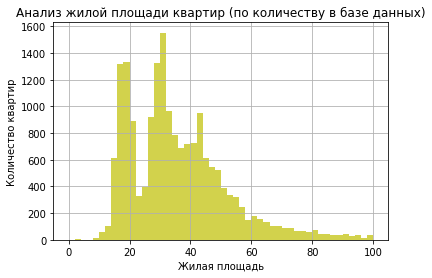

Показатели


count    18646.000000
mean        37.890430
std         23.738880
min          2.000000
25%         23.910577
50%         32.700000
75%         44.800000
max        409.700000
Name: living_area, dtype: float64

In [35]:
#жилая площадь;
df['living_area'].hist(bins=50, range=(0,100),grid=True, color='y', alpha=0.7)
plt.title('Анализ жилой площади квартир (по количеству в базе данных)')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['living_area'].describe()


<div><b>Наибольшее количество квартир жилой площадью 23-44 кв м</b></div>


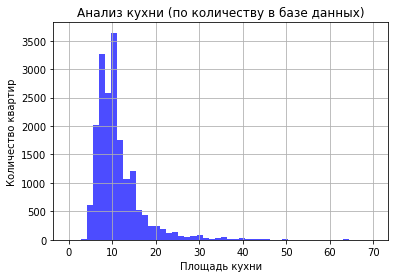

Показатели


count    18646.000000
mean        11.378480
std          6.405579
min          2.890000
25%          8.000000
50%         10.000000
75%         12.700000
max        112.000000
Name: kitchen_area, dtype: float64

In [36]:
#площадь кухни;
df['kitchen_area'].hist(bins=50, range=(0,70),grid=True, color='b', alpha=0.7)
plt.title('Анализ кухни (по количеству в базе данных)')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['kitchen_area'].describe()



<div><b>Наибольшее количество с площадью кухни 8-12 кв м')
</b><</div>

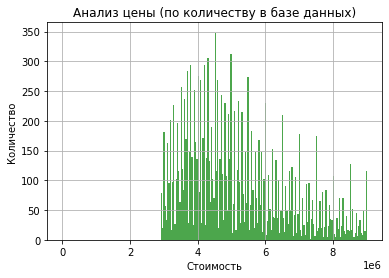

Показатели


count    1.864600e+04
mean     7.616677e+06
std      1.202943e+07
min      2.950000e+06
25%      4.140504e+06
50%      5.300000e+06
75%      7.600000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [37]:
#цена объекта;
df['last_price'].hist(bins=250, range=(0,9000000),grid=True, color='g', alpha=0.7)
plt.title('Анализ цены (по количеству в базе данных)')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

print ('Показатели' )
df['last_price'].describe()

<div><b>Наибольшее количество квартир стоимостью  от 4 до 7.6 млн</b></div>

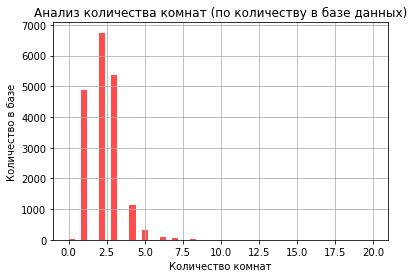

Показатели


count    18646.000000
mean         2.249222
std          1.083504
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [38]:
#количество комнат;
df['rooms'].hist(bins=50, range=(0,20),grid=True, color='r', alpha=0.7)
plt.title('Анализ количества комнат (по количеству в базе данных)')
plt.xlabel('Количество комнат')
plt.ylabel('Количество в базе')
plt.show()

print ('Показатели' )
df['rooms'].describe()

<div><b>Наибольшее количество квартир с 1-3 комнатами</b></div>

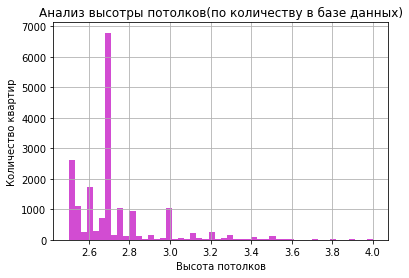

Показатели


count    18632.000000
mean         2.732767
std          0.328102
min          1.000000
25%          2.600000
50%          2.700000
75%          2.750000
max         22.600000
Name: ceiling_height, dtype: float64

In [39]:
#высота потолков;
df['ceiling_height'].hist(bins=50, range=(2.5,4),grid=True, color='m', alpha=0.7)
plt.title('Анализ высотры потолков(по количеству в базе данных)')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['ceiling_height'].describe()

<div><b>Наибольшее количество квартир с потолками 2.7 м </b></div>

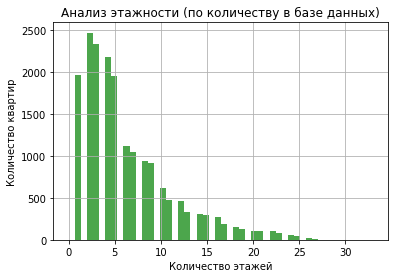

Показатели


count    18646.000000
mean         6.248472
std          4.999082
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: floor, dtype: float64

In [40]:
#этаж квартиры;
df['floor'].hist(bins=50, range=(0,33),grid=True, color='g', alpha=0.7)
plt.title('Анализ этажности (по количеству в базе данных)')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['floor'].describe()

<div><b>Наибольшее количество квартир расположено на 3-9 этажах</b></div>

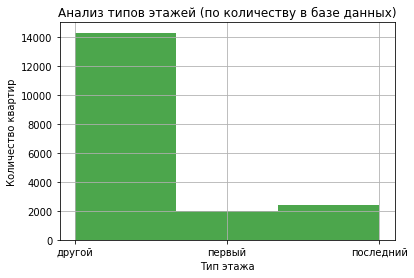

Показатели


count      18646
unique         3
top       другой
freq       14301
Name: floor_type, dtype: object

In [41]:
#тип этажа квартиры («первый», «последний», «другой»);
df['floor_type'].hist(bins=3,grid=True, color='g', alpha=0.7)
plt.title('Анализ типов этажей (по количеству в базе данных)')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['floor_type'].describe()

<div><b>Наибольшее количество  квартир раходятся не на крайних этажах<b></div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Зачем писать print() и выводить текст в отдельной ячейке, когда можно просто вот так: (выше)
</div>

<div class="alert alert-info">  скорректировала  </div>

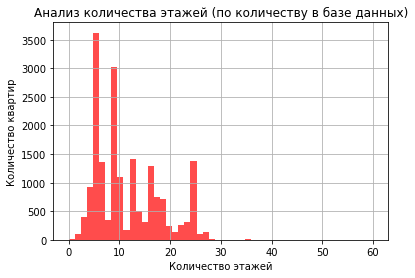

Показатели


count    18646.000000
mean        11.402767
std          6.608052
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [42]:
#общее количество этажей в доме;
df['floors_total'].hist(bins=50, range=(0,60),grid=True, color='r', alpha=0.7)
plt.title('Анализ количества этажей (по количеству в базе данных)')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['floors_total'].describe()

<div><b>Наибольшее количество объявление находятся в высотных зданиях</b></div>

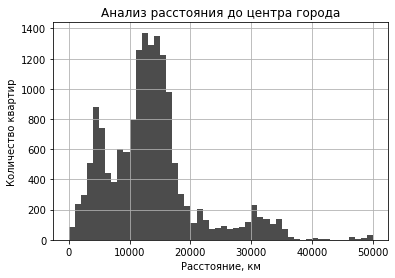

Показатели


count    16192.000000
mean     13754.891304
std       8267.846426
min        181.000000
25%       8732.750000
50%      12932.000000
75%      16047.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [43]:
#расстояние до центра города в метрах;
df['city_centers_nearest'].hist(bins=50, range=(0,50000),grid=True, color='k', alpha=0.7)
plt.title('Анализ расстояния до центра города')
plt.xlabel('Расстояние, км')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['city_centers_nearest'].describe()

<div><b>Наибольшее количество объявлений находятся в пределах 20 км от центра города</b><div>

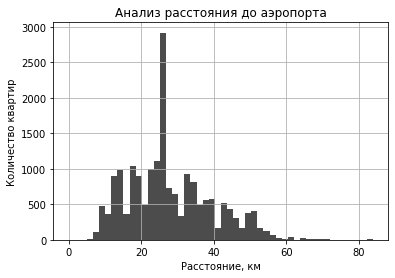

Показатели


count    18646.000000
mean        27.975759
std         11.657366
min          0.000000
25%         19.000000
50%         26.000000
75%         35.000000
max         84.000000
Name: airports_nearest, dtype: float64

In [44]:
#расстояние до ближайшего аэропорта;
df['airports_nearest'].hist(bins=50, range=(0,84),grid=True, color='k', alpha=0.7)
plt.title('Анализ расстояния до аэропорта')
plt.xlabel('Расстояние, км')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['airports_nearest'].describe()

<div><b>Наибольшее количество квартир находится в удалении от аэропорта</b></div>

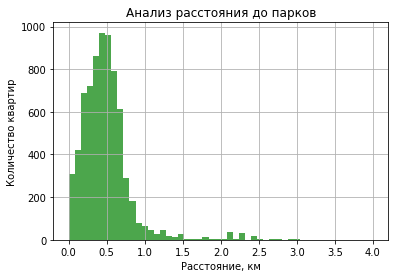

Показатели


count    7283.000000
mean        0.492373
std         0.344360
min         0.001000
25%         0.288000
50%         0.456000
75%         0.613000
max         3.064000
Name: parks_nearest, dtype: float64

In [45]:
#расстояние до ближайшего парка;
df['parks_nearest'].hist(bins=50, range=(0,4),grid=True, color='g', alpha=0.7)
plt.title('Анализ расстояния до парков')
plt.xlabel('Расстояние, км')
plt.ylabel('Количество квартир')
plt.show()

print ('Показатели' )
df['parks_nearest'].describe()

<div><b>Почти все квартиры в базе расположены недалеко от зеленой зоны</b></div>

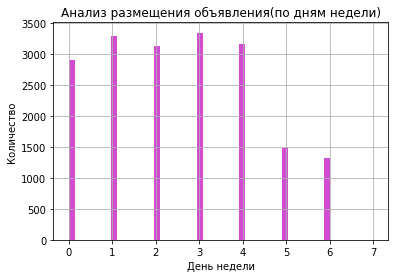

Показатели


count    18646.000000
mean         2.550574
std          1.789061
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: week_day, dtype: float64

In [46]:
#день и месяц публикации объявления.
df['week_day'].hist(bins=50, range=(0,7),grid=True, color='m', alpha=0.7)
plt.title('Анализ размещения объявления(по дням недели)')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.show()

print ('Показатели')
df['week_day'].describe()





<div><b>Большая часть объявлений публикуется в будние дни</b></div>

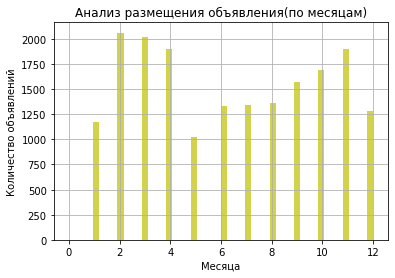

Показатели


count    18646.000000
mean         6.415049
std          3.493203
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [47]:

df['month'].hist(bins=50, range=(0,12),grid=True, color='y', alpha=0.7)
plt.title('Анализ размещения объявления(по месяцам)')
plt.xlabel('Месяца')
plt.ylabel('Количество объявлений')
plt.show()

print ('Показатели')
df['month'].describe()


<div><b>Наибольшее количество объявлений публикуется во втором и третьем кварталеб в январе наименьгшая активность ввиду праздников, а также заметно снижение активности в летний период</b></div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае не до продаж, все на огородах =)
</div>

count    16079.000000
mean       186.262392
std        225.853684
min          1.000000
25%         45.000000
50%         99.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

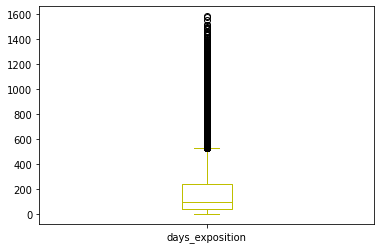

In [48]:
df.boxplot(column=['days_exposition'], grid= False , color='y')

df['days_exposition'].describe()

<div><b>Средняя продолжительность публикации объявлений составляет полгода</b>

Количество дней размещения объявления слабо коррелирует с параметрами квартиры.
В среднем продажа занимает  полгода - 186 дней.
"Быстрые продажи"- объявления, которые висели один день, возможно были переразмещены с уточнением параметров и потеряли актуальность.
Необычно долшие объявления размещены 238-1580 дней. Объявления, которые размещены 4 года возможно, просто забыли снять с публикации

</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так, чтобы ответить на вопрос "Какие продажи можно считать быстрыми, а какие — необычно долгими?" лучше посмотреть на распределение данных с помощью boxplot() или describe().
</div>

<div class="alert alert-info">  скорректировала  </div>


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Я бы рекомендовал брать 25% и 75% распеределение данных за быстрые и долгие соответственно
</div>

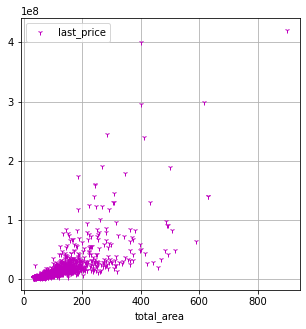

Зависимость цены от площади: 



0.58

In [49]:

(df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='1', color='m',figsize=(5, 5)))
plt.show()
print('Зависимость цены от площади:','\n')
(df['last_price'].corr(df['living_area'])).round(2)

<div><b>Чем больше площадь, тем больше цена</b></div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

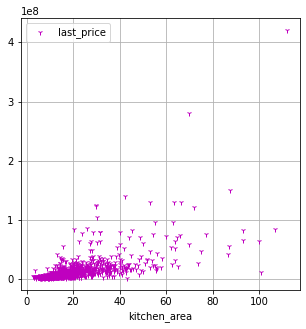

Зависимость цены от площади кухни: 



0.5

In [50]:
(df.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='1', color='m',figsize=(5, 5)))
plt.show()
print('Зависимость цены от площади кухни:','\n')
(df['last_price'].corr(df['kitchen_area'])).round(2)




Зависимость цены от количества комнат: 



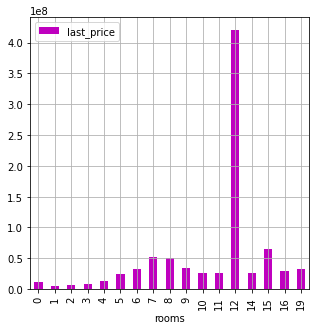

0.35

In [51]:
print('Зависимость цены от количества комнат:','\n')
(df.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, kind='bar', color='m',figsize=(5, 5)))
plt.show()

(df['last_price'].corr(df['rooms'])).round(2)



Зависимость цены от количества комнат: 



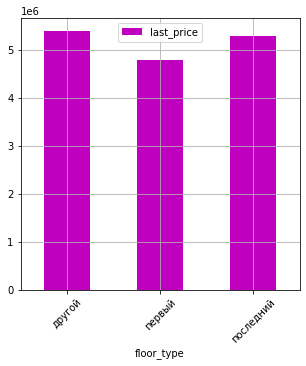

In [52]:
print('Зависимость цены от количества комнат:','\n')
(df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, kind='bar', color='m',figsize=(5, 5)))
plt.xticks(rotation = 45)
plt.show()






<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

А если сгруппировать по медиане?
</div>

<div class="alert alert-info">  скорректировала  </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

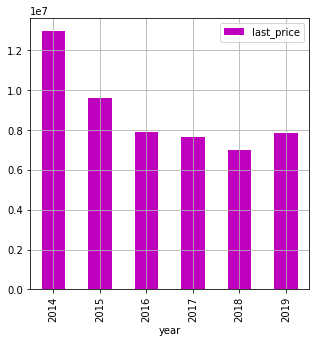

In [53]:

(df.pivot_table(index='year', values='last_price')
    .plot(grid=True, kind='bar', color='m',figsize=(5, 5)))
plt.show()

<div><b>Наибольшая цена наблюдалась в 2014 году, высокая волатильность рыночной ценынедвижисти связана скорее всего с изменением курса доллара и санкциями, в остальные года существенного роста цены не наблюдалась, скорее,  цена была стабльной.</b></div>

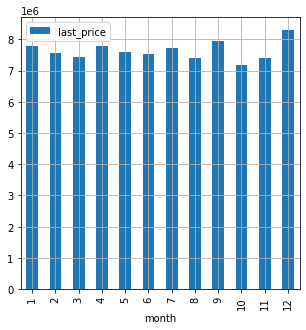

In [54]:
(df.pivot_table(index='month', values='last_price')
    .plot(grid=True, kind='bar', figsize=(5, 5)))
plt.show()

<div><b>Изменение цены не зависит от месяца публикации объявления. Небольшой рост можно отметить в декабре. </b></div>

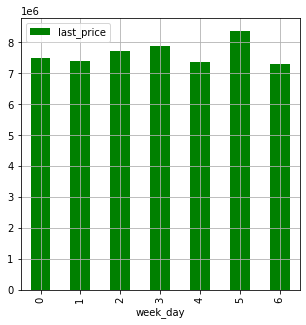

In [55]:
(df.pivot_table(index='week_day', values='last_price')
    .plot(grid=True,  kind='bar', figsize=(5, 5), color='g'))
plt.show()

<div><b>День недели публикации объявления также не влияет на стоиомсть недвижимости</b></div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Лучше после каждого раздела, графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи - так проще читать проект, поскольку будущим коллегам или заказчику не надо будет самим интерпретировать результаты каждого раздела, теста или графика.

<div class="alert alert-info">  скорректировала  </div>

In [65]:
df.groupby('locality_name').agg({'locality_name':'count', 'price_per_meter':'median'})

,locality_name,price_per_meter
locality_name,,
волосово,1,40350.880
волхов,5,41666.670
всеволожск,267,66173.290
выборг,115,62000.000
гатчина,175,71528.750
...,...,...
сестрорецк,171,99375.000
сосновый бор,64,75042.660
тихвин,3,45000.000


In [70]:
df.groupby('locality_name').agg({'balcony':'count', 'price_per_meter':'median'}).sort_values(by='balcony', ascending = False)\
    .head(10)\
#   .plot(grid=False, kind='barh', figsize=(10,50), color='b')
#plt.xticks(rotation = 25)
#plt.show()

,balcony,price_per_meter
locality_name,,
санкт-петербург,14261,104431.360
посeлок шушары,352,76625.590
посeлок мурино,343,85680.500
пушкин,322,99993.590
посeлок парголово,298,92330.315
всеволожск,267,66173.290
колпино,261,74097.140
деревня кудрово,242,91293.400
гатчина,175,71528.750


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Лучше не хардкодить, а использовать группировку (Не станем мы писать 50 районов, если нужно будет найти ТОП-50). Можно использовать, например, вот такую конструкцию:
    
    df.groupby('что группируем').agg({'столбец по котому считаем':'count', 'цена':'median'})
</div>

<div class="alert alert-info"> Я исправила код, но не могу вывести первые 10, подскажи, пожалуйста. я пробовала черещ iloc[:10], он тогда пропадает сразу Санкт-Петербург
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Тут изначально 2 ошибки было:
    
1. У тебя 2 одинаковых названия столбца. За кол-во объявлений, я тут можно брать любой столбец (желательно, без пропусков).
    
2. Сортировка лучше по убыванию
    
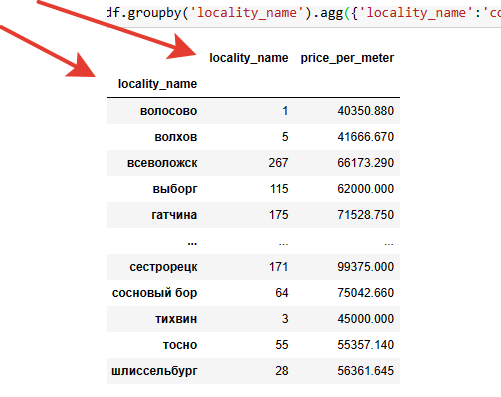
</div>

<div><b>Ли́сий Нос — посёлок в России на северном берегу Финского залива, поэтому там стоимость 1 кв метра значительно выше, чем в остальных территориальных образованиях Ленинградскй области.
Стоимость квартир в Санкт-Петербурге значительно выше, чем в остальных территориальных образованиях в обости. В г. Пушкин стоимость также высока, но это скорее всего связано с исторической и культурной ценностью города.
А вот высокая стоимость квадратного метра в деревне Бор сложно объяснить, возможно там преимущетсвенно коттеджные послеки или таунхаусы</b></div>

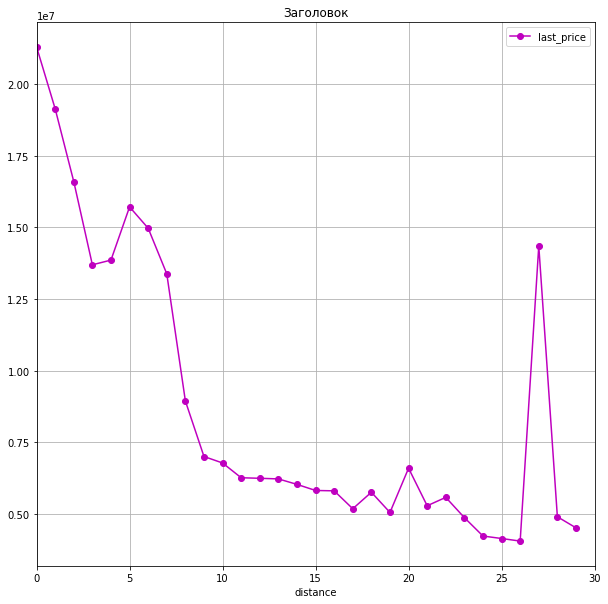

In [57]:
#выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
df['distance'] = df['city_centers_nearest'] / 1000
df['distance'] = df['distance'].fillna(0).astype(int)
spb_price=df.query('locality_name == "санкт-петербург"').pivot_table(index='distance', values='last_price', aggfunc='mean')\
    .plot(grid=True, style='o-', xlim=(0,30), figsize=(10, 10), color='m', title = 'Заголовок')



<div><b>В центре города квартиры значительно дороже, чем в удалении. Есть пик стоимости на расстоянии 25 км, но это скорее всего выброс</b></div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация. В твой код добавил заголовок, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

### Общий вывод

<div><b>Наибольшее количество квартир:</b>
    
- общей площадью 44-75 кв м
- жилой площадью 23-44 кв м
- площадью кухни 8-12 
- кв м
- стоимостью  от 4 до 7.6 млн
- с 1-3 комнатами
- с потолками 2.7 м
- расположено на 3-9 этажах
- раходятся не на крайних этажах
- находятся в высотных зданиях
- находятся в пределах 20 км от центра города
- находятся в удалении от аэропорта
- расположены недалеко от зеленой зоны

<b>Основные выводы:</b>
    
Большая часть объявлений публикуется в будние дни.
Наибольшее количество объявлений публикуется во втором и третьем кварталеб в январе наименьгшая активность ввиду праздников, а также заметно снижение активности в летний период.
Средняя продолжительность публикации объявлений составляет полгода.
Чем больше площадь, тем больше цена.
Самые высокие цены на недвижимости наблюдались в 2014 году, возможно из-за дефолта, далее стоимоть квартир стабильна
В центре города квартиры значительно дороже, чем в удалении. Есть пик стоимости на расстоянии 25 км, но это скорее всего выброс.
    
<b>Немного о стоимости недвижимости за 1 кв метр</b>:  
Ли́сий Нос — посёлок в России на северном берегу Финского залива, поэтому там стоимость 1 кв метра значительно выше, чем в остальных территориальных образованиях Ленинградскй области. Стоимость квартир в Санкт-Петербурге значительно выше, чем в остальных территориальных образованиях в обости. В г. Пушкин стоимость также высока, но это скорее всего связано с исторической и культурной ценностью города. А вот высокая стоимость квадратного метра в деревне Бор сложно объяснить, возможно там преимущетсвенно коттеджные послеки или таунхаусы.
    </font>



<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. В целом проект отличный, основной момент в оформлении

---

Нужно поправить:

1) оформление проекта

2) Какие продажи можно считать быстрыми, а какие — необычно долгими?

3) ТОП-10

4) После каждого раздела / графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи

5) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

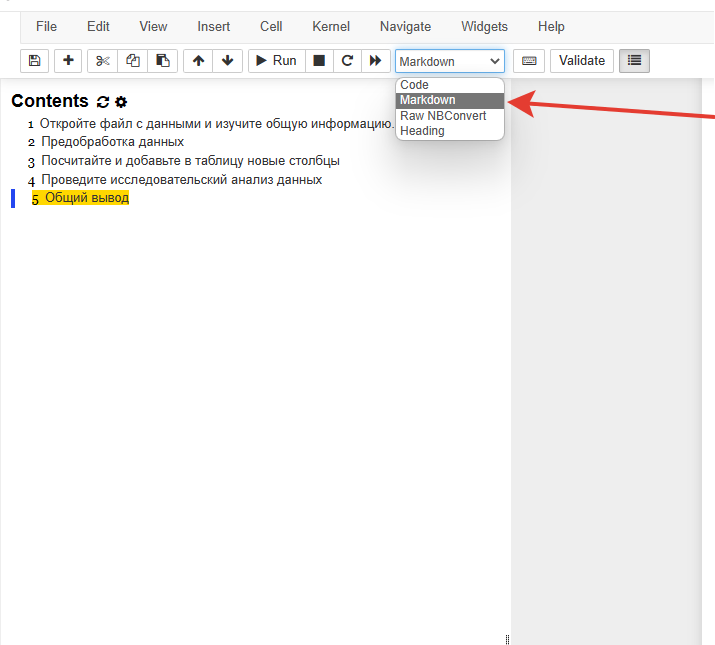

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x] заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x] построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод